# 实验二：手写数字预测

In [1]:
import socket
hostname =socket.gethostname()
ip = socket.gethostbyname(hostname)
print("本机IP地址：",ip)

本机IP地址： 127.0.0.1


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
%matplotlib inline

## 一、加载数据及数据处理

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
#    transforms.Normalize((0.1307), (0.3081))
])

In [4]:
data_dir = '/Users/sunxiaolei/Downloads/Deep Learning/实验材料/02MNIST手写数字分类(softmax)/datasets'
# 加载 MNIST 数据集
# train_set = datasets.MNIST(root=data_dir, train=True,download=True)
train_set = datasets.MNIST(root=data_dir, train=True,download=True,transform=transform)
# test_set = datasets.MNIST(root=data_dir, train=False,download=True)
test_set = datasets.MNIST(root=data_dir, train=False,download=True, transform=transform)

In [5]:
train_data_mean = train_set.data.float().mean() / 255.
train_data_std = train_set.data.float().std() / 255.
print(f"MNIST 数据集的均值为 {train_data_mean:.4f}，标准差为{train_data_std:.4f}")

MNIST 数据集的均值为 0.1307，标准差为0.3081


label is :0


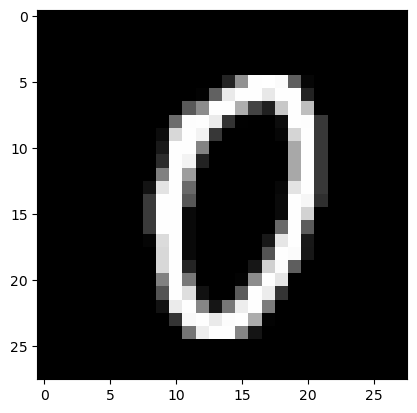

In [6]:
index = 1000
demo_pic = train_set.data[index]
plt.imshow(demo_pic, cmap='gray')
print(f'label is :{train_set.targets[index]}')

In [7]:
# 定义数据加载器
batch_size = 128
train_loader = torch.utils.data.DataLoader(
train_set,batch_size=batch_size, shuffle=True
)
test_loader = torch.utils.data.DataLoader(
test_set,batch_size=batch_size, shuffle=False
)

## 二、定义模型

In [8]:
class SoftMaxModel(nn.Module):
    def __init__(self):
        super(SoftMaxModel, self).__init__()
        self.linear = nn.Linear(784,10)
        
    def forward(self, x):
        x = x.view(-1, 784)
        return self.linear(x)

## 三、训练模型

In [9]:
def train():
    model = SoftMaxModel()
    #model = model.cuda()
    # 定义优化器和损失函数
    lr = 0.1
    criterion = nn.CrossEntropyLoss()  # 交叉熵
    optimizer = optim.SGD(model.parameters(), lr=lr)
    
    # 训练
    num_epochs = 15
    losses = []
    for epoch in range(num_epochs):
        epoch_loss = 0.
        j = 0
        for i, (images, labels) in enumerate(train_loader):
            j += 1
            #images = images.cuda()
            #labels = labels.cuda()
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
            if (i+1) % 100 == 0:
                print('Epoch[{}/{}], Step[{}/{}], Loss:{:.4f}'
                .format(epoch+1,num_epochs,i+1,len(train_loader),loss.item())) 
        losses.append(epoch_loss / j)
    return losses, model
            

In [10]:
%time losses, model = train()

Epoch[1/15], Step[100/469], Loss:0.6686
Epoch[1/15], Step[200/469], Loss:0.4548
Epoch[1/15], Step[300/469], Loss:0.4690
Epoch[1/15], Step[400/469], Loss:0.3690
Epoch[2/15], Step[100/469], Loss:0.3573
Epoch[2/15], Step[200/469], Loss:0.4138
Epoch[2/15], Step[300/469], Loss:0.3239
Epoch[2/15], Step[400/469], Loss:0.3449
Epoch[3/15], Step[100/469], Loss:0.2648
Epoch[3/15], Step[200/469], Loss:0.3002
Epoch[3/15], Step[300/469], Loss:0.2830
Epoch[3/15], Step[400/469], Loss:0.4273
Epoch[4/15], Step[100/469], Loss:0.3957
Epoch[4/15], Step[200/469], Loss:0.1995
Epoch[4/15], Step[300/469], Loss:0.3124
Epoch[4/15], Step[400/469], Loss:0.2560
Epoch[5/15], Step[100/469], Loss:0.5475
Epoch[5/15], Step[200/469], Loss:0.2068
Epoch[5/15], Step[300/469], Loss:0.3848
Epoch[5/15], Step[400/469], Loss:0.3586
Epoch[6/15], Step[100/469], Loss:0.3643
Epoch[6/15], Step[200/469], Loss:0.3417
Epoch[6/15], Step[300/469], Loss:0.2114
Epoch[6/15], Step[400/469], Loss:0.3679
Epoch[7/15], Step[100/469], Loss:0.3268


In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

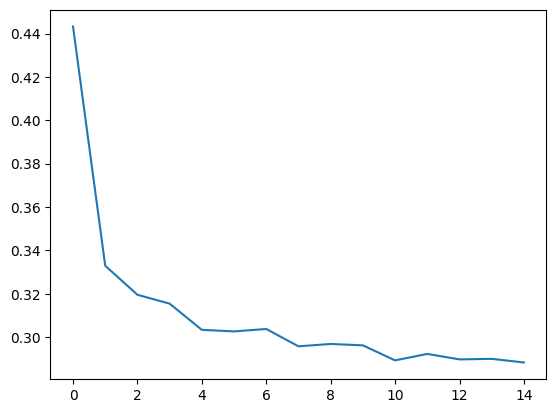

In [36]:
plt.plot(losses)

## 四、测试模型

In [37]:
# 测试模型
model.cpu()
with torch.no_grad(): #关闭模型训练
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Accuracy on Test Set: {:.2f}%'.format(100 * correct
/ total))

Accuracy on Test Set: 90.90%
